In [10]:
# numpy, scipy, pandasのインポート
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame
# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline
# 小数第3位まで表示
%precision 3

'%.3f'

In [2]:
# 作業ディレクトリの表示
%pwd

'C:\\git\\DataScienceBasic\\notebooks'

In [6]:
%cd ../
%mkdir data
%cd data

C:\git\DataScienceBasic
C:\git\DataScienceBasic\data


サブディレクトリまたはファイル data は既に存在します。


In [1]:
# webからデータを取得したり、zipファイルを扱うためのライブラリ
import requests, zipfile
from io import StringIO
import io

In [7]:
# データがあるurlの指定
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
# データをurlから取得する
r = requests.get(url, stream=True)
# zipfileを読み込み展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [8]:
%ls

 ドライブ C のボリューム ラベルは SSD 1TB (Samsung NVME) です
 ボリューム シリアル番号は 9A1B-6291 です

 C:\git\DataScienceBasic\data のディレクトリ

2022/05/18  21:58    <DIR>          .
2022/05/18  21:58    <DIR>          ..
2022/05/18  21:58             3,206 student.txt
2022/05/18  21:58            56,993 student-mat.csv
2022/05/18  21:58               269 student-merge.R
2022/05/18  21:58            93,220 student-por.csv
               4 個のファイル             153,688 バイト
               2 個のディレクトリ  275,738,009,600 バイトの空き領域


In [11]:
student_data_math = pd.read_csv('student-mat.csv')

In [12]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [13]:
# データの読み込み
# 区切りに“;”を指定
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [14]:
# すべてのカラムの情報等チェック
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [15]:
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

In [16]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

In [18]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

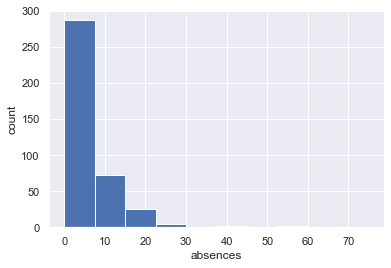

In [19]:
# histogram、データの指定
plt.hist(student_data_math['absences'])
# x軸とy軸のそれぞれのラベル
plt.xlabel('absences')
plt.ylabel('count')
# グリッドをつける
plt.grid(True)

In [20]:
# 平均値
print('平均値：', student_data_math['absences'].mean())
# 中央値：中央値でデータを分けると中央値の前後でデータ数が同じになる（データの真ん中の値）、外れ値の値に影響を受けにくい
print('中央値：', student_data_math['absences'].median())
# 最頻値：最も頻度が多い値
print('最頻値：', student_data_math['absences'].mode())

平均値： 5.708860759493671
中央値： 4.0
最頻値： 0    0
Name: absences, dtype: int64


In [21]:
# 分散
student_data_math['absences'].var(ddof=0)

63.887

In [22]:
# 標準偏差 σ
student_data_math['absences'].std(ddof=0)

7.993

In [23]:
# 要約統計量
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [24]:
# 要約統計量まとめて計算
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


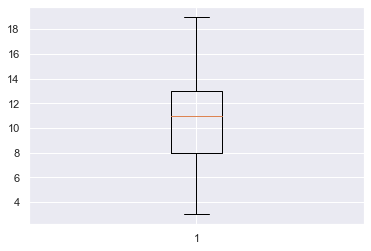

In [25]:
# 箱ひげ図：G1
plt.boxplot(student_data_math['G1'])
plt.grid(True)

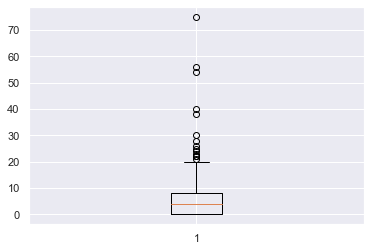

In [26]:
# 箱ひげ図：欠席数
plt.boxplot(student_data_math['absences'])
plt.grid(True)

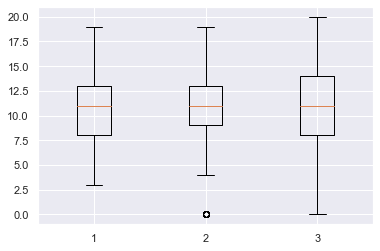

In [27]:
# 箱ひげ図：G1,G2,G3
plt.boxplot([student_data_math['G1'], student_data_math['G2'],
student_data_math['G3']])
plt.grid(True)

In [28]:
# 変動係数：欠席数
student_data_math['absences'].std() / student_data_math['absences'].mean()

1.402

In [29]:
# それぞれの変動係数をまとめて計算
student_data_math.std() / student_data_math.mean()

C:\Users\mars2\AppData\Local\Temp\ipykernel_40668\3950402227.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  student_data_math.std() / student_data_math.mean()


age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

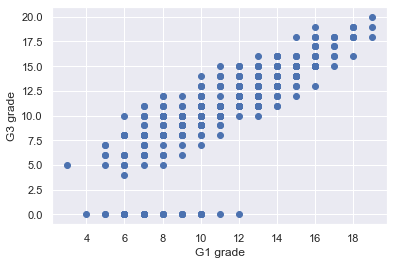

In [30]:
# 散布図
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
# ラベル
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

In [31]:
# 共分散行列（G1とG3）
np.cov(student_data_math['G1'], student_data_math['G3'])

array([[11.017, 12.188],
       [12.188, 20.99 ]])

In [32]:
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

(0.801, 0.000)

In [33]:
# 相関行列
np.corrcoef([student_data_math['G1'], student_data_math['G3']])

array([[1.   , 0.801],
       [0.801, 1.   ]])

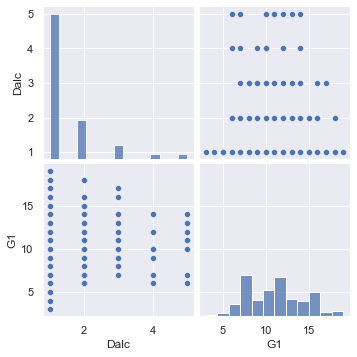

In [34]:
sns.pairplot(student_data_math[['Dalc','G1']])
plt.grid(True)

In [35]:
# 例：週末にアルコールを飲む人の成績G1の平均
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64